# Ellipsoidal nested sampling

This example demonstrates how to use ellipsoidal nested rejection sampling [1] to sample from the posterior distribution for a logistic model fitted to model-simulated data.

[1] "A nested sampling algorithm for cosmological model selection", Pia Mukherjee, David Parkinson and Andrew R. Liddle, [arXiv:astro-ph/0508461v2](https://arxiv.org/abs/astro-ph/0508461).

First create fake data.

In [1]:
import pints
import pints.toy as toy
import numpy as np
import matplotlib.pyplot as plt

# Load a forward model
model = toy.LogisticModel()

# Create some toy data
r = 0.015
k = 500
real_parameters = [r, k]
times = np.linspace(0, 1000, 100)
signal_values = model.simulate(real_parameters, times)

# Add independent Gaussian noise
sigma = 10
observed_values = signal_values + pints.noise.independent(sigma, signal_values.shape)

# Plot
plt.plot(times,signal_values,label = 'signal')
plt.plot(times,observed_values,label = 'observed')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

Create the nested sampler that will be used to sample from the posterior.

In [2]:
# Create an object with links to the model and time series
problem = pints.SingleOutputProblem(model, times, observed_values)

# Create a log-likelihood function (adds an extra parameter!)
log_likelihood = pints.GaussianLogLikelihood(problem)

# Create a uniform prior over both the parameters and the new noise variable
log_prior = pints.UniformLogPrior(
    [0.01, 400, sigma * 0.5],
    [0.02, 600, sigma * 1.5])

# Create a nested ellipsoidal rejectection sampler
controller = pints.NestedController(log_likelihood, log_prior,
                                    method=pints.NestedEllipsoidSampler)

# Set number of iterations
controller.set_iterations(8000)

# Set the number of posterior samples to generate
controller.set_n_posterior_samples(1600)

# Do proposals in parallel
controller.set_parallel(True)

# Use dynamic enlargement factor
controller._sampler.set_dynamic_enlargement_factor(1)

Run the sampler!

In [3]:
samples = controller.run()
print('Done!')

Running Nested ellipsoidal sampler
Number of active points: 400
Total number of iterations: 8000
Total number of posterior samples: 1600
Iter. Eval. Time m:s Delta_log(z) Acceptance rate
0     1       0:00.1 -inf          1             
0     2       0:00.1 -inf          1             
0     21      0:00.2 -inf          1             
0     41      0:00.2 -inf          1             
0     61      0:00.2 -inf          1             
0     81      0:00.3 -inf          1             
0     101     0:00.3 -inf          1             
0     121     0:00.3 -inf          1             
0     141     0:00.4 -inf          1             
0     161     0:00.4 -inf          1             
0     181     0:00.4 -inf          1             
0     201     0:00.5 -inf          1             
0     221     0:00.5 -inf          1             
0     241     0:00.5 -inf          1             
0     261     0:00.6 -inf          1             
0     281     0:00.6 -inf          1             
0     301    

2800  10408   0:04.6 -22.09995184  0.279776179   
2820  10648   0:04.7 -21.41645945  0.275175644   
2840  10888   0:04.7 -20.78000114  0.27078566    
2860  11032   0:04.8 -20.1637183   0.268999248   
2880  11248   0:04.8 -19.5526662   0.265486726   
2900  11488   0:04.9 -18.97763979  0.261544011544
2920  11512   0:04.9 -18.44690078  0.262778978   
2940  11536   0:04.9 -17.96067126  0.264008621   
2960  11560   0:04.9 -17.47690226  0.265232975   
2980  11584   0:05.0 -17.02573917  0.266452074392
3000  11632   0:05.0 -16.56928077  0.267094017094
3020  11656   0:05.0 -16.05887861  0.26830135    
3040  11704   0:05.0 -15.59176215  0.268931352   
3060  11728   0:05.0 -15.15365307  0.270127119   
3080  11776   0:05.1 -14.74566629  0.270745429   
3100  11824   0:05.1 -14.35002456  0.271358543   
3120  11872   0:05.1 -13.94509984  0.271966527   
3140  11920   0:05.1 -13.53108802  0.272569444   
3160  11968   0:05.2 -13.10397468  0.273167358   
3180  12040   0:05.5 -12.68366924  0.273195876   


## Plot posterior samples versus true parameter values (dashed lines)

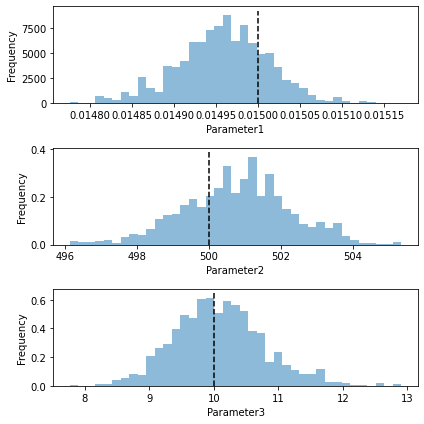

In [4]:
# Plot output
import pints.plot

pints.plot.histogram([samples], ref_parameters=[r, k, sigma])

plt.show()

## Plot posterior predictive simulations versus the observed data

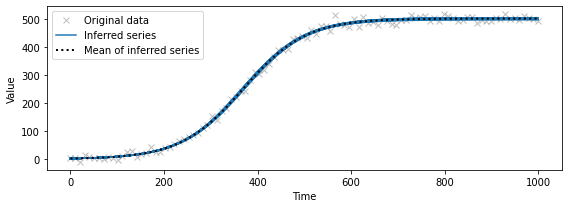

In [5]:
pints.plot.series(samples[:100], problem)
plt.show()

## Marginal likelihood estimate

In [6]:
print('marginal log-likelihood = ' + str(controller.marginal_log_likelihood())
      + ' ± ' + str(controller.marginal_log_likelihood_standard_deviation()))

marginal log-likelihood = -382.18988862037673 ± 0.0783612067991932


## Effective sample size

In [7]:
print('effective sample size = ' + str(controller.effective_sample_size()))

effective sample size = 1578.7847256966925
